In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpmath as mp
import requests
import warnings

In [2]:
from building_data import get_tile, osmbuildings_request, receive_building_data, polyarea, get_tile, tile_bbox
from polygon_intersections import PolygonClipper

In [3]:
coords = [48.813898, 2.264216]

In [4]:
paris_tile = osmbuildings_request(coords[0], coords[1])

URL: https://data.osmbuildings.org/0.2/anonymous/tile/15/16590/11279.json


In [32]:
def get_tile_buildings(json):
    buildings = []
    for building in json['features']:
        height = building['properties']['height']
        coords = building['geometry']['coordinates'][0]
        building_data = [height, coords]
        buildings.append(building_data)
        buildings_arr = np.array(buildings)
    return buildings_arr

In [33]:
buildings_arr = get_tile_buildings(paris_tile)

/tmp/ipykernel_8974/1421392227.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  buildings_arr = np.array(buildings)


In [6]:
buildings = get_tile_buildings(paris_tile)

In [7]:
len(buildings)

1843

In [8]:
buildings[:3]

[[3,
  [[2.264284, 48.80854],
   [2.264271, 48.808532],
   [2.264219, 48.808564],
   [2.264237, 48.808584],
   [2.264256, 48.808572],
   [2.264245, 48.808564],
   [2.264284, 48.80854]]],
 [9,
  [[2.263195, 48.811304],
   [2.263671, 48.811124],
   [2.263559, 48.810995],
   [2.263083, 48.811175],
   [2.263195, 48.811304]]],
 [9,
  [[2.263402, 48.811512],
   [2.263622, 48.811429],
   [2.263509, 48.8113],
   [2.263289, 48.811383],
   [2.263402, 48.811512]]]]

In [30]:
buildings[1][1]

[[2.263195, 48.811304],
 [2.263671, 48.811124],
 [2.263559, 48.810995],
 [2.263083, 48.811175],
 [2.263195, 48.811304]]

In [10]:
tile = get_tile(coords[0], coords[1], zoom=15)

In [11]:
bounds = tile_bbox(tile[0], tile[1], tile[2])

In [12]:
bounds

[2.26318359375, 48.81409852735573, 2.274169921875, 48.80686346108517]

In [9]:
true_bounds = [[48.81409852735573, 2.26318359375], [48.81409852735573, 2.274169921875], 
               [48.80686346108517, 2.274169921875], [48.81409852735573, 2.26318359375],
               [48.81409852735573, 2.26318359375]]

In [18]:
example_grid_long = (bounds[2] - bounds[0])/10
example_grid_lat = (bounds[3] - bounds[1])/10
midpoint_long = (bounds[2] + bounds[0])/2
midpoint_lat = (bounds[3] + bounds[1])/2
leftlong = midpoint_long - example_grid_long
rightlong = midpoint_long + example_grid_long
toplat = midpoint_lat + example_grid_lat
bottomlat = midpoint_lat - example_grid_lat
example_pixel = [[leftlong, toplat], [rightlong, toplat],
                 [rightlong, bottomlat], [leftlong, bottomlat], [leftlong, toplat]]

In [19]:
example_pixel

[[2.267578125, 48.8097574875934],
 [2.269775390625, 48.8097574875934],
 [2.269775390625, 48.81120450084751],
 [2.267578125, 48.81120450084751],
 [2.267578125, 48.8097574875934]]

In [22]:
lat_range = example_pixel[1][0] - example_pixel[0][0]
lat_range

-0.002197265625

In [34]:
def get_matching_building(buildings):
    for building in buildings:
        building_coords = building[1]
        for point in building_coords:
            if 2.267578125 < point[0] < 2.269775390625 and 48.8097574875934 < point[1] < 48.81120450084751:
                return buildings.index(building)

In [35]:
get_matching_building(buildings)

189

In [37]:
test_building = buildings[189][1]

In [41]:
test_building

[[2.270057, 48.809691],
 [2.270013, 48.809605],
 [2.269855, 48.809646],
 [2.269622, 48.80969],
 [2.269663, 48.809776],
 [2.270057, 48.809691]]

In [44]:
def get_single_split_coords(building):
    """Separate lon and lat
    """
    x = []
    y = []
    for coord in building:
        x.append(coord[0])
        y.append(coord[1])
    return x, y

In [45]:
x_test, y_test = get_single_split_coords(test_building)

In [53]:
print(x_test, y_test)

[2.270057, 2.270013, 2.269855, 2.269622, 2.269663, 2.270057] [48.809691, 48.809605, 48.809646, 48.80969, 48.809776, 48.809691]


In [ ]:
x_test[:-1], 

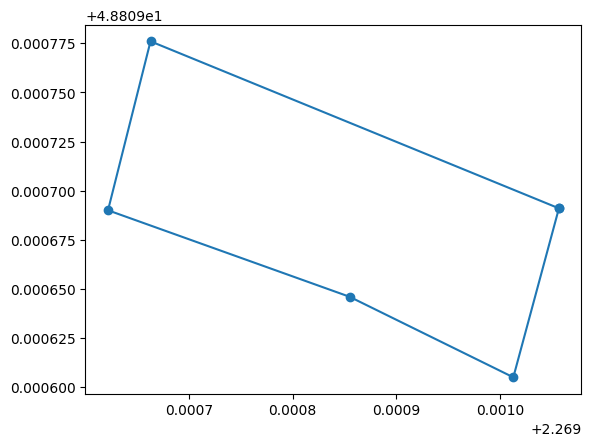

In [51]:
plt.plot(x_test, y_test, marker='o')

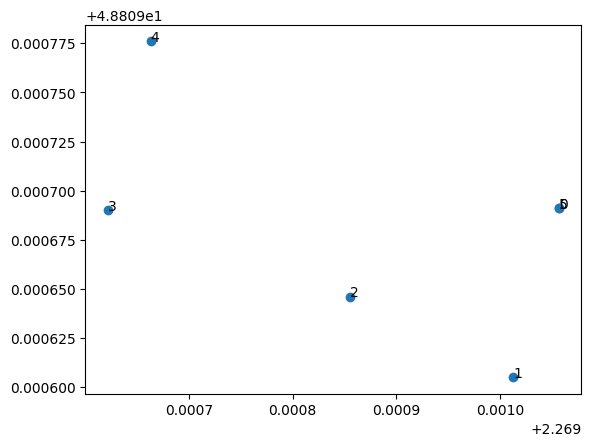

In [52]:
fig, ax = plt.subplots()
ax.scatter(x_test, y_test)

for i in range(len(x_test)):
    ax.annotate(i, (x_test[i], y_test[i]))


In [56]:
test_building[:-1]

[[2.270057, 48.809691],
 [2.270013, 48.809605],
 [2.269855, 48.809646],
 [2.269622, 48.80969],
 [2.269663, 48.809776]]

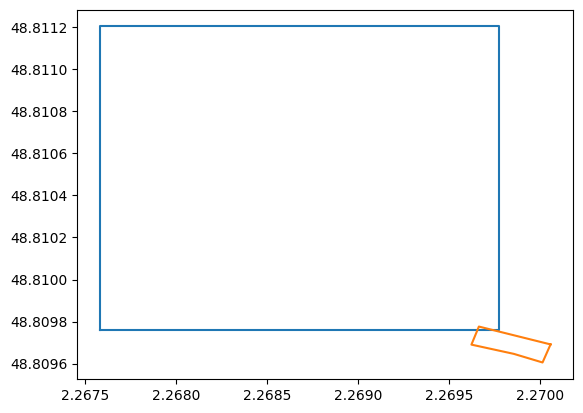

In [57]:
plt.plot(*get_single_split_coords(example_pixel))
plt.plot(x_test, y_test)

In [54]:
clip = PolygonClipper(warn_if_empty = True)

In [55]:
clipped = clip(test_building[:-1], example_pixel)

/home/matt/code/b-fa-ce/future_proofing_cities/modules/polygon_intersections.py:119: UserWarning: No intersections found. Are you sure your                           polygon coordinates are in clockwise order?
  warnings.warn("No intersections found. Are you sure your \
